In [16]:
# =============================================================================
# 1. Importação de bibliotecas
# =============================================================================
import sys, os
sys.path.append(os.path.abspath("../src"))


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [17]:
# =============================================================================
# 2. Carregar dados
# =============================================================================
# Se já tiver um arquivo Excel/CSV em data/raw, altere o caminho aqui.
# Caso contrário, você pode usar os dados simulados do módulo do projeto.


from data_processing import DataProcessor, generate_sample_data

# Gerando dados de exemplo (5.000 registros simulados)
raw_data = generate_sample_data(5000)

# Visualizar primeiras linhas
raw_data.head()


,pedido_id,data_pedido,cliente_id,produto,categoria,quantidade,preco_unitario,valor_total,estado,canal_venda
0,PED1000,2025-05-10 00:48:01.957627,6734,Tablet iPad,Tablets,2,2596.63,5193.26,RJ,Online
1,PED1001,2025-05-25 00:48:01.969158,2685,Fones JBL Bluetooth,Áudio,2,312.13,624.26,SP,Marketplace
2,PED1002,2024-10-31 00:48:01.969158,5555,iPhone 14,Smartphones,1,3927.28,3927.28,MG,Online
3,PED1003,2024-09-10 00:48:01.969158,3047,Smartphone Samsung Galaxy,Smartphones,1,1211.89,1211.89,SP,Online
4,PED1004,2025-02-12 00:48:01.969982,8734,Caixa de Som JBL,Áudio,1,557.04,557.04,GO,Online


In [18]:
# =============================================================================
# 3. Análise de qualidade dos dados
# =============================================================================
processor = DataProcessor()
processor.load_data(data=raw_data)

quality_report = processor.data_quality_check()
quality_report

✅ Dados carregados: 5000 registros
📊 RELATÓRIO DE QUALIDADE DOS DADOS
----------------------------------------
Dimensões: (5000, 10)
Duplicatas: 0
Uso de memória: 1.85 MB
Valores nulos por coluna:


{'shape': (5000, 10),
 'null_values': {'pedido_id': 0,
  'data_pedido': 0,
  'cliente_id': 0,
  'produto': 0,
  'categoria': 0,
  'quantidade': 0,
  'preco_unitario': 0,
  'valor_total': 0,
  'estado': 0,
  'canal_venda': 0},
 'data_types': {'pedido_id': dtype('O'),
  'data_pedido': dtype('<M8[ns]'),
  'cliente_id': dtype('int64'),
  'produto': dtype('O'),
  'categoria': dtype('O'),
  'quantidade': dtype('int64'),
  'preco_unitario': dtype('float64'),
  'valor_total': dtype('float64'),
  'estado': dtype('O'),
  'canal_venda': dtype('O')},
 'duplicates': np.int64(0),
 'memory_usage': np.float64(1.8516950607299805)}

In [19]:
# =============================================================================
# 4. Estatísticas descritivas básicas
# =============================================================================
raw_data.describe(include="all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
pedido_id,5000,5000,PED1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_pedido,5000,NaN,NaN,NaN,2025-02-21 19:13:23.503390464,2024-08-21 00:48:02.011225,2024-11-23 00:48:03.097833472,2025-02-23 00:48:03.065847552,2025-05-26 00:48:02.333090816,2025-08-20 00:48:03.383744,NaN
cliente_id,5000.0,NaN,NaN,NaN,5541.9814,1003.0,3263.0,5638.5,7784.75,9998.0,2610.929905
produto,5000,16,Mouse Gamer Logitech,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categoria,5000,11,Periféricos,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantidade,5000.0,NaN,NaN,NaN,1.7384,1.0,1.0,1.0,2.0,5.0,1.11275
preco_unitario,5000.0,NaN,NaN,NaN,1541.033488,64.04,299.795,932.945,2637.0975,5399.11,1409.516212
valor_total,5000.0,NaN,NaN,NaN,2663.407786,64.04,393.3975,1429.53,3509.535,26907.35,3365.587377
estado,5000,8,SP,1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
canal_venda,5000,3,Online,2486,NaN,NaN,NaN,NaN,NaN,NaN,NaN


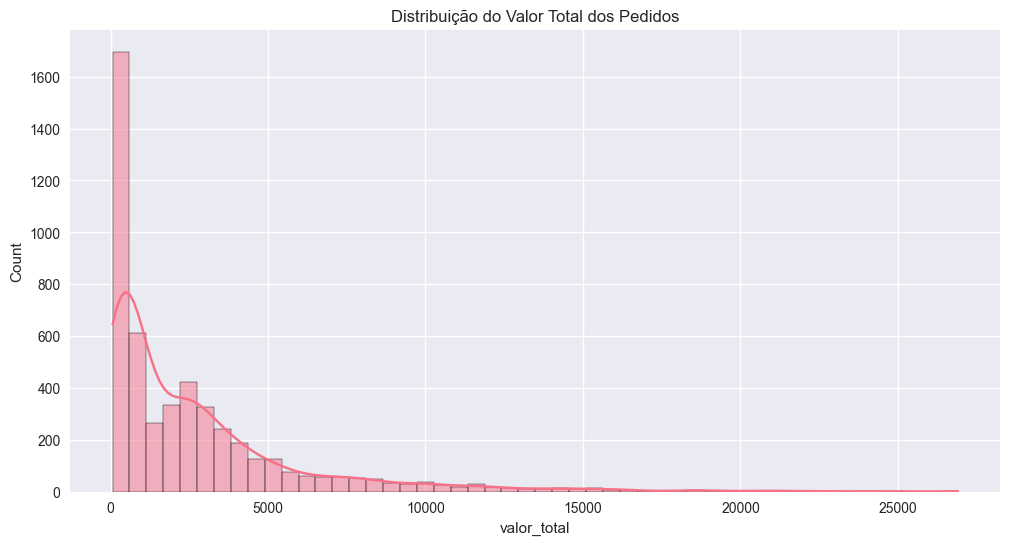

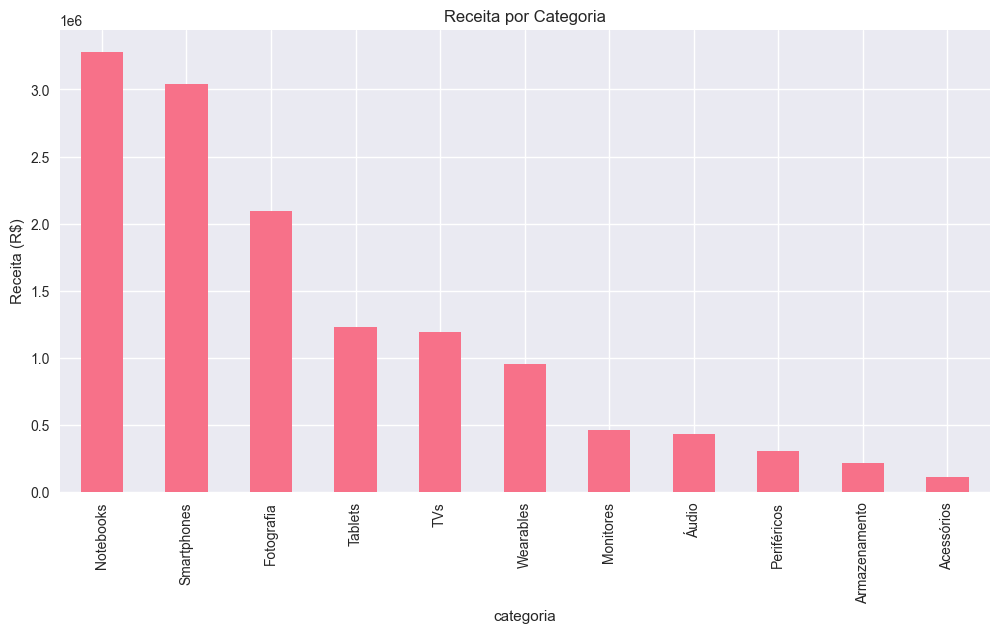

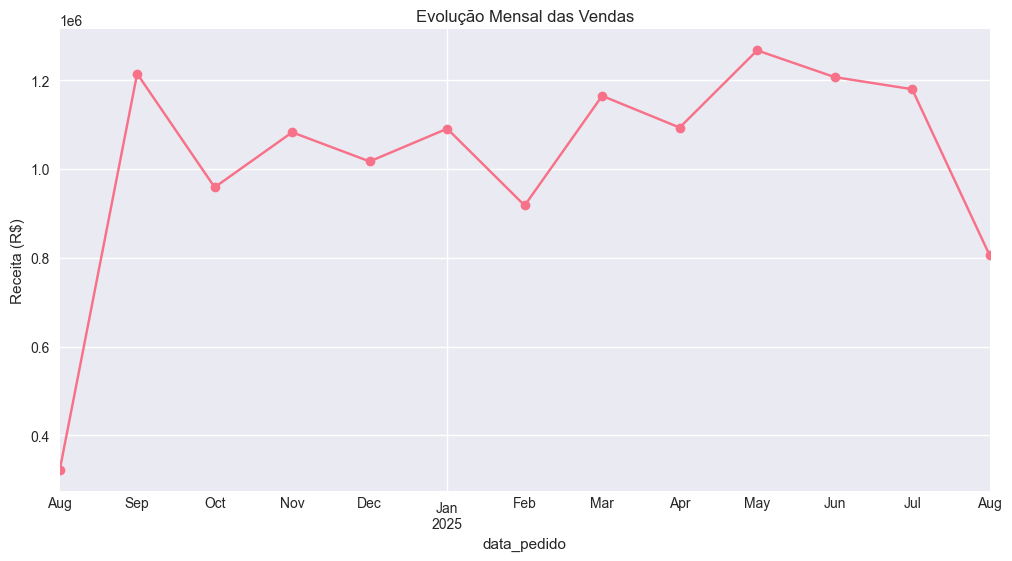

In [20]:
# =============================================================================
# 5. Visualizações rápidas
# =============================================================================

# Distribuição de valores de pedidos
sns.histplot(raw_data['valor_total'], bins=50, kde=True)
plt.title("Distribuição do Valor Total dos Pedidos")
plt.show()

# Vendas por categoria
raw_data.groupby('categoria')['valor_total'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Receita por Categoria")
plt.ylabel("Receita (R$)")
plt.show()

# Evolução temporal
raw_data.groupby(raw_data['data_pedido'].dt.to_period('M'))['valor_total'].sum().plot(marker='o')
plt.title("Evolução Mensal das Vendas")
plt.ylabel("Receita (R$)")
plt.show()